In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('DATA/fake_reg.csv')

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


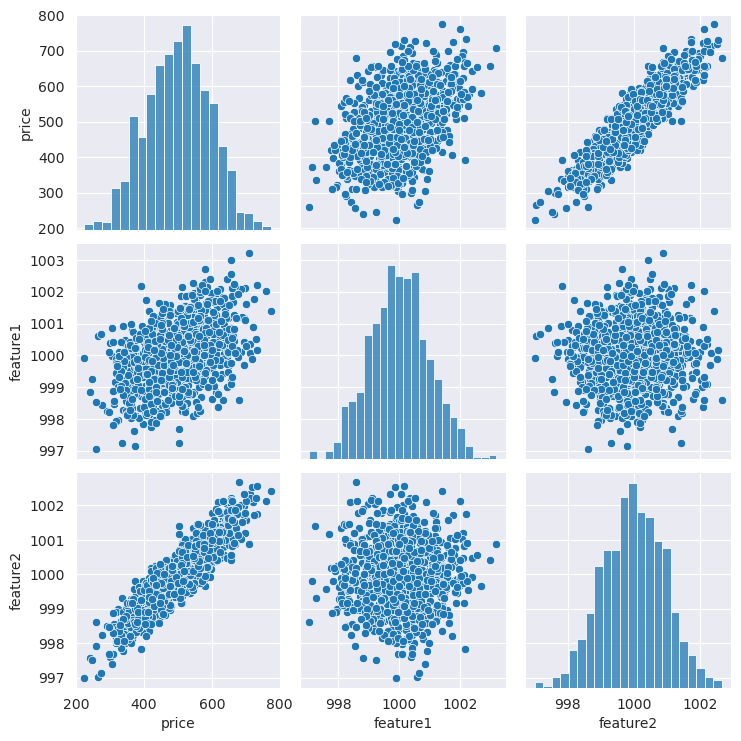

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['feature1','feature2']].values

In [8]:
y = df['price'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
#help(MinMaxScaler)

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_test

array([[ 0.39533339,  0.38540671],
       [ 0.57300502,  0.74070924],
       [ 0.61294076,  0.65734264],
       [ 0.38169528,  0.73076311],
       [ 0.07776591,  0.46323644],
       [ 0.49421971,  0.68949258],
       [ 0.2065742 ,  0.70096247],
       [ 0.55141988,  0.41776773],
       [ 0.36812191,  0.69082394],
       [ 0.56465724,  0.3877465 ],
       [ 0.57048029,  0.71810824],
       [ 0.79569525,  0.47979901],
       [ 0.38488235,  0.41856516],
       [ 0.33142545,  0.42411972],
       [ 0.89361377,  0.63912775],
       [ 0.50191166,  0.39789174],
       [ 0.7159808 ,  0.43688384],
       [ 0.35812192,  0.92028225],
       [ 0.49989367,  0.85589311],
       [ 0.63965434,  0.59024789],
       [ 0.19053626,  0.34203634],
       [ 0.40982896,  0.45849208],
       [ 0.26844791,  0.40167269],
       [ 0.38649709,  0.33592759],
       [ 0.50654703,  0.65789843],
       [ 0.41260556,  0.79338075],
       [ 0.45631316,  0.61323307],
       [ 0.44064792,  0.40889315],
       [ 0.42963904,

# Model

In [1]:
import tensorflow as tf
from tensorflow import keras

2023-05-13 05:37:18.979971: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
#model = keras.models.Sequential([keras.layers.Dense(4, activation='relu'),
#                                 keras.layers.Dense(2, activation='relu'),
#                                 keras.layers.Dense(1)])

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1)) # output
model.compile(optimizer='rmsprop', loss='mse')

In [26]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256480.0156
Epoch 2/250
22/22 [==============================] - 0s 918us/step - loss: 256279.0625
Epoch 3/250
22/22 [==============================] - 0s 917us/step - loss: 256055.5625
Epoch 4/250
22/22 [==============================] - 0s 913us/step - loss: 255798.7188
Epoch 5/250
22/22 [==============================] - 0s 900us/step - loss: 255508.8438
Epoch 6/250
22/22 [==============================] - 0s 919us/step - loss: 255174.9688
Epoch 7/250
22/22 [==============================] - 0s 902us/step - loss: 254795.3125
Epoch 8/250
22/22 [==============================] - 0s 902us/step - loss: 254368.6406
Epoch 9/250
22/22 [==============================] - 0s 917us/step - loss: 253889.5938
Epoch 10/250
22/22 [==============================] - 0s 938us/step - loss: 253356.0938
Epoch 11/250
22/22 [==============================] - 0s 937us/step - loss: 252763.6406
Epoch 12/250
22/22 [=======================

In [28]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

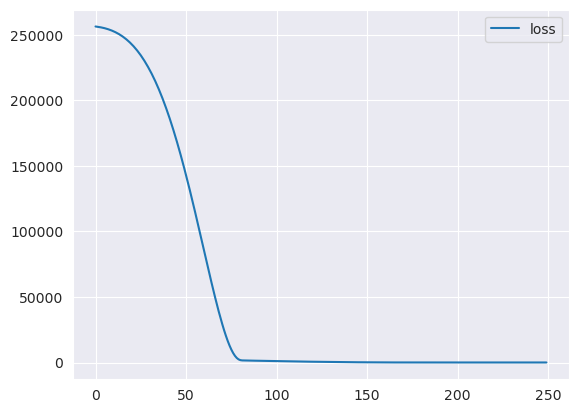

In [29]:
loss_df.plot()

In [30]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 879us/step - loss: 26.0428


26.042804718017578

In [31]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 791us/step - loss: 24.0898


24.089845657348633

In [38]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 821us/step


In [39]:
test_predictions

array([[406.01486],
       [624.7006 ],
       [593.2334 ],
       [573.2771 ],
       [367.2499 ],
       [580.2496 ],
       [515.9829 ],
       [459.94608],
       [550.2505 ],
       [448.33627],
       [612.9237 ],
       [549.9723 ],
       [419.8516 ],
       [409.59875],
       [652.4735 ],
       [438.09256],
       [509.39566],
       [661.15295],
       [663.8174 ],
       [566.5886 ],
       [334.8035 ],
       [445.63724],
       [383.20078],
       [379.42795],
       [567.6417 ],
       [611.72   ],
       [533.3679 ],
       [428.63208],
       [656.6606 ],
       [414.8301 ],
       [443.4418 ],
       [486.01285],
       [439.207  ],
       [683.11945],
       [425.53162],
       [418.4302 ],
       [502.86142],
       [551.49207],
       [510.65628],
       [396.04892],
       [619.746  ],
       [417.38074],
       [605.5753 ],
       [446.777  ],
       [502.90744],
       [582.8097 ],
       [670.2651 ],
       [491.30402],
       [319.13785],
       [486.31143],


In [43]:
test_predictions = pd.Series(test_predictions.reshape(300,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [48]:
pred_df.columns = ['Test True Y', 'Model Predictions']

<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

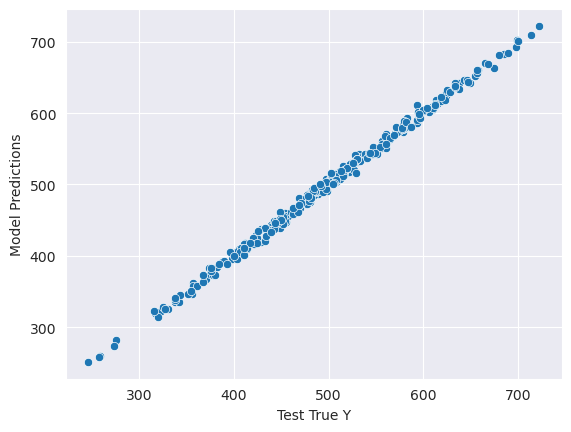

In [49]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [51]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.127310434619804

indicates we are 4$ off the price, while mean price is 498$

In [52]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [53]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

26.04280497401858

In [54]:
new_gem = [[998, 1000]]

In [56]:
new_gem = scaler.transform(new_gem)

In [57]:
model.predict(new_gem)

1/1 [==============================] - 0s 15ms/step


array([[420.42703]], dtype=float32)

In [58]:
from keras import models

In [59]:
models.save_model(model,filepath='.')

TypeError: save_model() missing 1 required positional argument: 'filepath'